# Superstore Outlier Detection

### Pyod Library for Outlier Tutorials

https://pyod.readthedocs.io/en/latest/relevant_knowledge.html



### Dataset taken from
https://www.kaggle.com/juhi1994/superstore


### More Tutorials

https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

https://medium.com/@Davis_David/introduction-to-anomaly-detection-using-machine-learning-with-a-case-study-part-one-3fa2ae08f413

https://medium.com/analytics-vidhya/introduction-to-anomaly-detection-using-machine-learning-with-a-case-study-part-two-f78243f74d2f


### Graphic code followed from
https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb


# Read the dataset

In [1]:
# importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

# calling all pyod libraries
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from scipy import stats

plt.rcParams['figure.figsize'] = (12,8)


/Users/khan_m_a/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# !pip install pyod

In [4]:
# read the datset
df = pd.read_excel('Superstore.xls')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# EDA

<AxesSubplot:ylabel='sub_cat_val.index'>

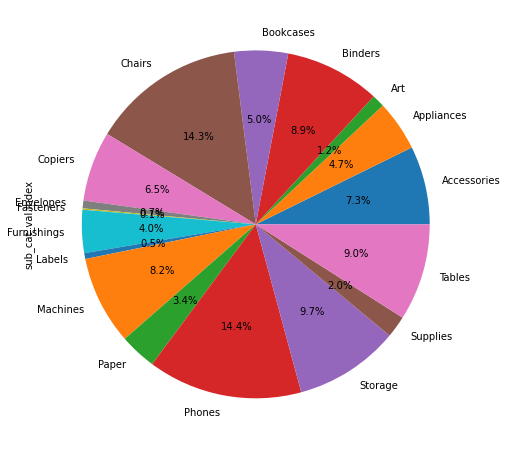

In [6]:
# Pie Chart for Sub-Category

plt.figure.figsize = (20,20)
sub_cat_val = df.groupby('Sub-Category')['Sales'].sum()

sub_cat_val.plot(kind = 'pie', autopct='%1.1f%%', label = 'sub_cat_val.index' )

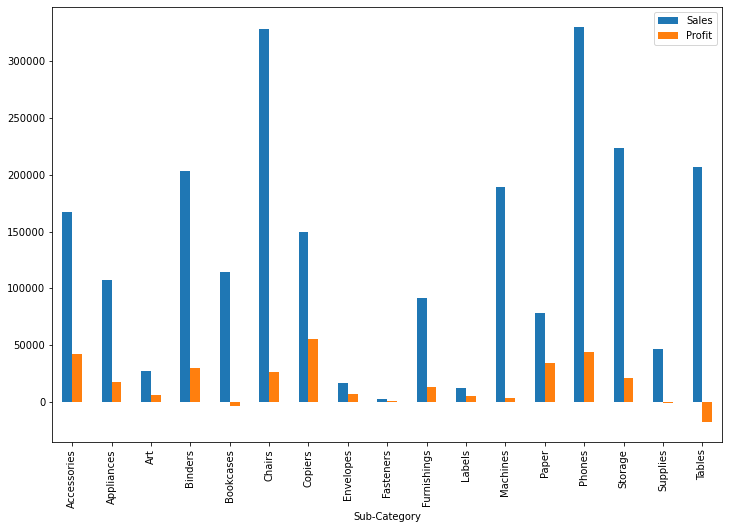

In [7]:
# group by Sub-Category
df.groupby('Sub-Category')['Sales', 'Profit'].sum().plot.bar();


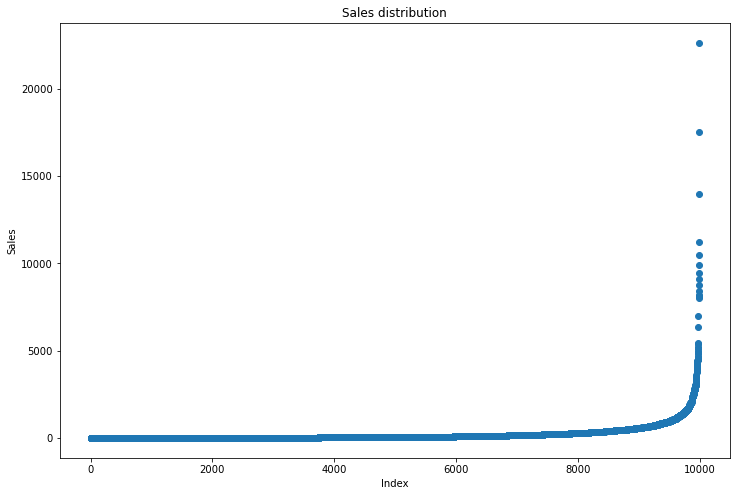

In [8]:
# lets check Sales

sales_sorted = np.sort(df['Sales'].values)

plt.scatter(range(df.shape[0]), sales_sorted)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales distribution');

### Observations:
(1) Any Sales more than 10000 should be considered as outlier.

(2) Phones generate the maximum revenew but copier bring more profit.

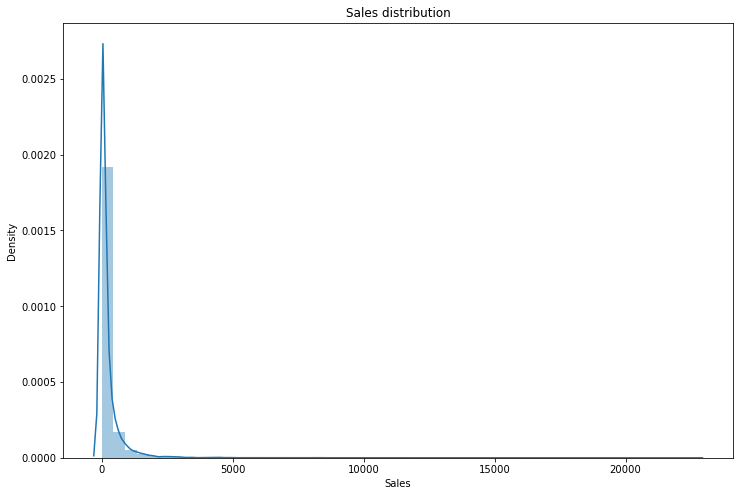

In [9]:
#histogram
sns.distplot(df['Sales'])
plt.title('Sales distribution');

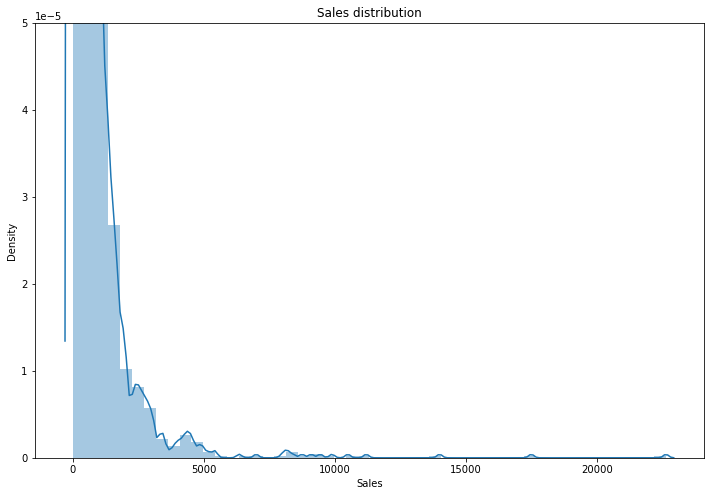

In [10]:
#histogram zoom in
sns.distplot(df['Sales'])
plt.title('Sales distribution')
plt.ylim(0, 0.00005);

In [11]:
# check skewness and Kurtosis
print('Skewness of df[Sale] is :',df['Sales'].skew())
print('Kurtosis of df[Sale] is :',df['Sales'].kurt())


Skewness of df[Sale] is : 12.972752341816228
Kurtosis of df[Sale] is : 305.31175324682283



"Skewness assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is referred to as skewed. Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center)." (Hair et al., 2017, p. 61)


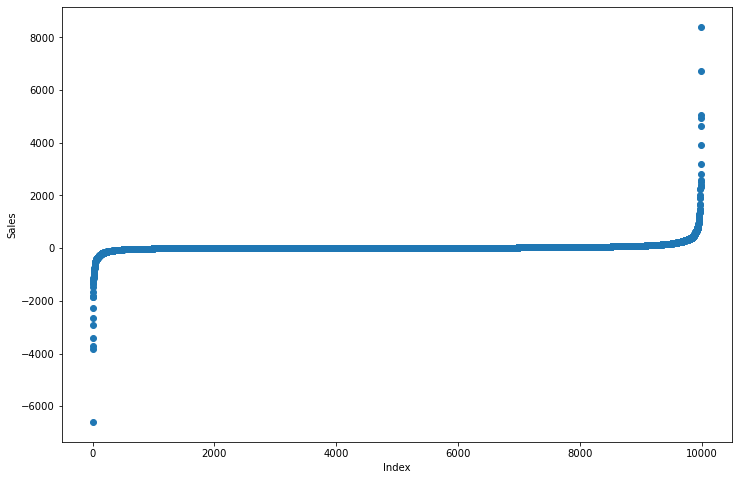

In [12]:
# lets check Profits

sales_sorted = np.sort(df['Profit'].values)

plt.scatter(range(df.shape[0]), sales_sorted)
plt.xlabel('Index')
plt.ylabel('Sales');

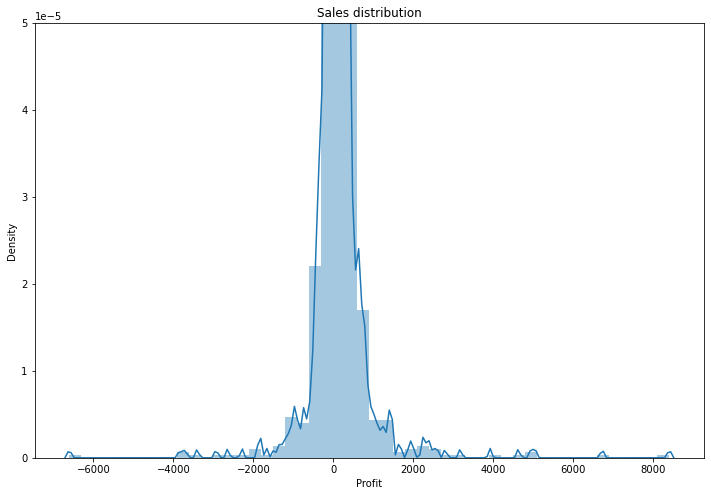

In [13]:
#histogram zoom in
sns.distplot(df['Profit'])
plt.title('Sales distribution')
plt.ylim(0, 0.00005);

In [14]:
# check skewness and Kurtosis
print('Skewness of df[Profit] is :',df['Profit'].skew())
print('Kurtosis of df[Profit] is :',df['Profit'].kurt())


Skewness of df[Profit] is : 7.561431562468336
Kurtosis of df[Profit] is : 397.188514552414


# Univariate Anomaly Detection

### code taken from sklearn
https://scikitlearn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py


### Isolation Forest

(1) Similiar to Random Forest as it is build on an ensemble of trees.

(2) Good for large dataset

(3) Outlier will have its own leaf. Isolation forest detects that leaf.



In [15]:
# IsloationForest on sales
clf = IsolationForest(n_estimators = 100)
clf.fit(df['Sales'].values.reshape(-1,1))

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

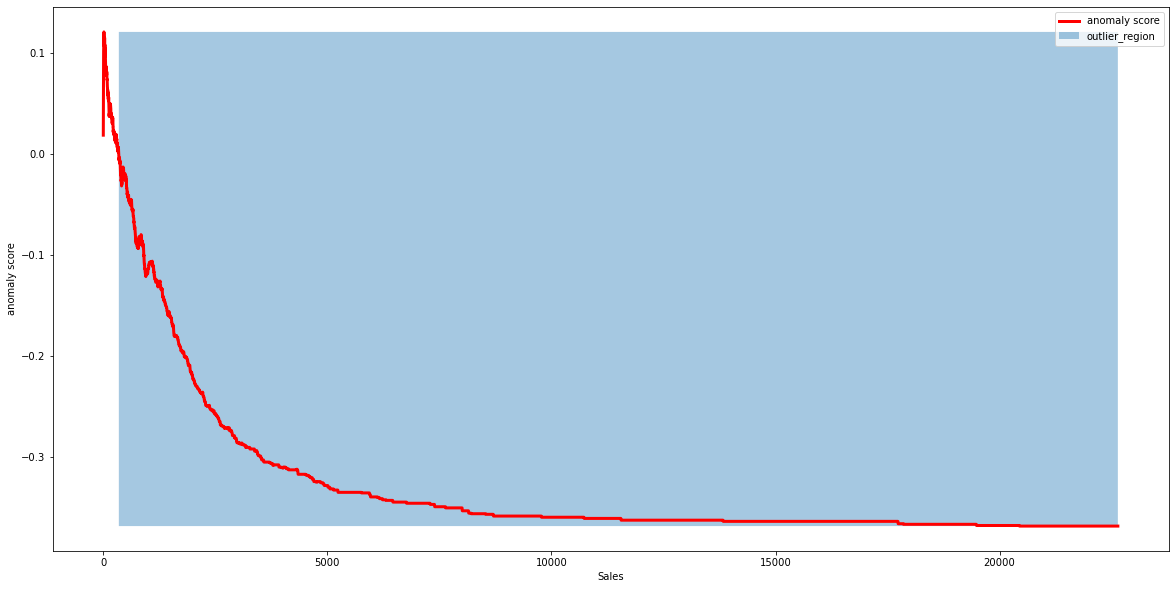

In [16]:
# code taken from
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py


# fit the model
# clf = IsolationForest(max_samples=100, random_state=rng)
# clf.fit(X_train)
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(xx)
outlier = clf.predict(xx)
plt.figure(figsize=(20,10))
plt.plot(xx, anomaly_score, color= 'r', linewidth =3, label='anomaly score')
# plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
#                  where=outlier==-1, color='r', 
#                  alpha=.4, label='outlier region')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                alpha = 0.4, where = outlier == -1,
                label = 'outlier_region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show()




In [17]:
# IsloationForest on Profit and Sales
clf1 = IsolationForest(n_estimators = 100)
clf1.fit(df['Profit'].values.reshape(-1,1))

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

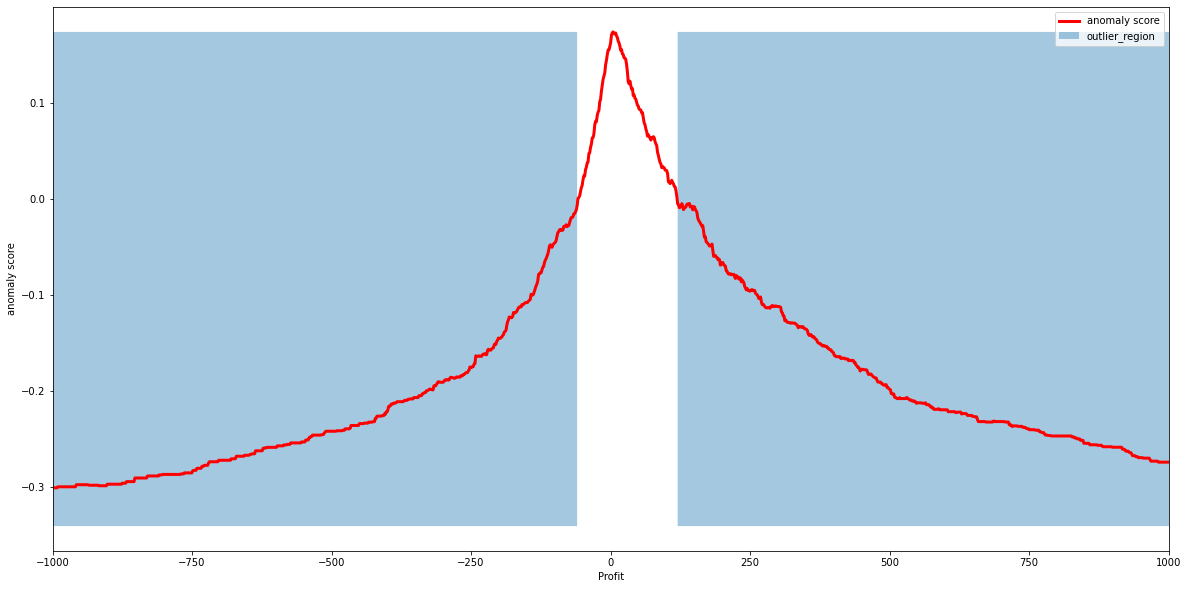

In [18]:
# code taken from
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py


# fit the model
# clf = IsolationForest(max_samples=100, random_state=rng)
# clf.fit(X_train)
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = clf1.decision_function(xx)
outlier = clf1.predict(xx)
plt.figure(figsize=(20,10))
plt.plot(xx, anomaly_score, linewidth =3, color = 'r', label='anomaly score')
# plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
#                  where=outlier==-1, color='r', 
#                  alpha=.4, label='outlier region')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                alpha = 0.4, where = outlier == -1,
                label = 'outlier_region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.xlim(-1000,1000)
plt.show()

### Observations:

(1) Sales more than 10000 dollars can safely classified as outlier.

(2) Profit between -2000 and 2000 dollars are outliers.

# Multivariate Anomaly Detection

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

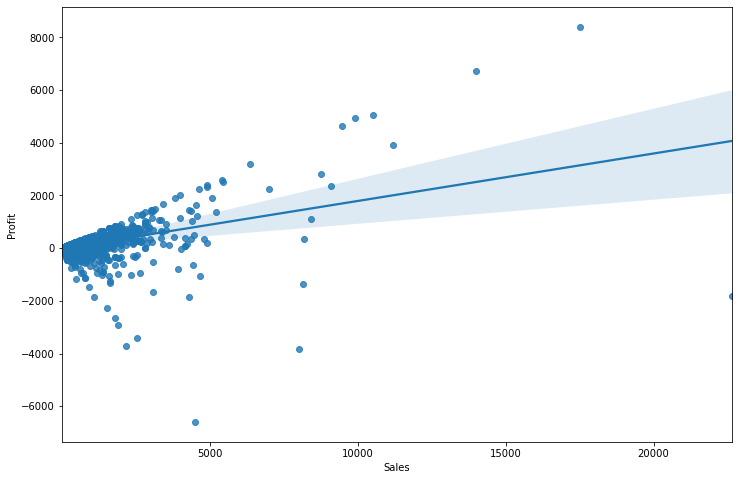

In [19]:
# Multi-variate Analysis using Sales and Profit

sns.regplot(x ='Sales', y='Profit', data = df)

In [20]:
# keeping only sales and profit
sale_profit = ['Sales', 'Profit']
df[sale_profit].head()


,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [21]:
# Standarize the dataset
min_max = MinMaxScaler(feature_range=(0,1))
df[['Sales', 'Profit']] = min_max.fit_transform(df[['Sales', 'Profit']])
df[sale_profit].head()

,Sales,Profit
0,0.011552,0.442794
1,0.032313,0.454639
2,0.000626,0.440458
3,0.042280,0.414464
4,0.000968,0.440168


In [22]:
# create only two columns
X1 = df['Sales'].values.reshape(-1,1)
X2 = df['Profit'].values.reshape(-1,1)
X = np.concatenate((X1, X2), axis =1)
X

array([[0.01155206, 0.44279413],
       [0.0323127 , 0.45463873],
       [0.0006262 , 0.44045798],
       ...,
       [0.01140258, 0.44129277],
       [0.00128792, 0.44088789],
       [0.0107216 , 0.4448631 ]])

# Histogram based Outlier Detection

###

(1) This unsupervised algorith assumes that features are independent to each other. 

(2) It creates histogram for each features.

(3) Outlier score is calculated by filtering values in histogram hence it is very fast.



In [23]:
# Reference
# https://www.dfki.de/fileadmin/user_upload/import/6431_HBOS-poster.pdf



In [24]:
# Code taken from
# https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

OUTLIERS: 90 INLIERS: 9904


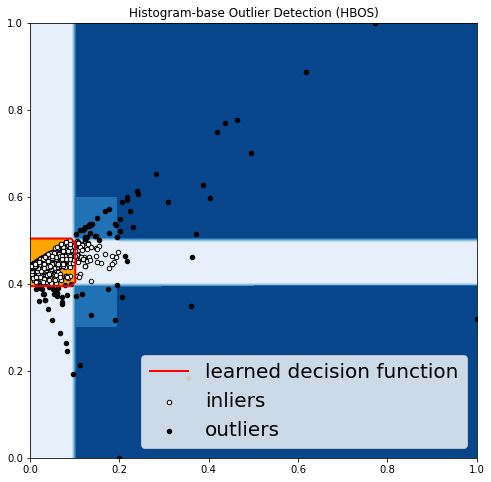

In [25]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = HBOS(contamination=outliers_fraction)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = np.percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')  
     
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Histogram-base Outlier Detection (HBOS)')
plt.show();

# KNN

### KNN

(1) KNN is supervised ML algorithm however when it comes to anomaly detection it acts as unsupervised algo because there is not much to learn from the training set.

(2) User-defined contamination is percentage of outliers we want algorithm to detect.

(3) For a datapoint its distance to Kth nearest neighbour is considered as outlier score.



### Code for visualization taken from

https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb


OUTLIERS:  91 INLIERS:  9903


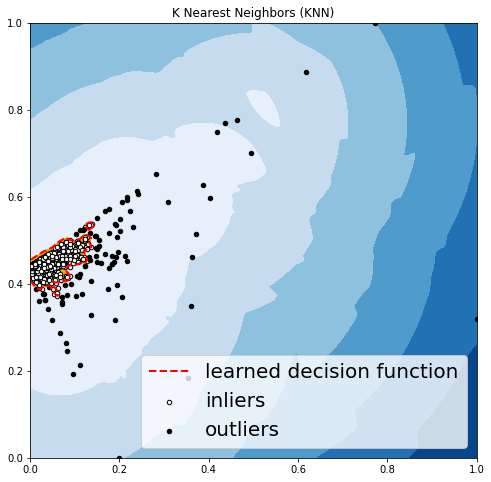

In [26]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = np.percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')  
   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('K Nearest Neighbors (KNN)')
plt.show();

In [27]:
df1[df1['outlier'] == 1].head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outlier
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.136186,7,0.5,0.328996,1
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,0.360434,8,0.4,0.349333,1
251,252,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,...,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,0.147845,13,0.0,0.482400,1


# Cluster Based Local Outlier Factor (Pyod Library)

### 
(1) This unsupervised algorithm classifies data into small and alrge clusters.

(2) Then it compares density of cluster to other neighbouring cluster.

(3) Anomaly score is calculated based on location of points. If in larger cluster its anomaly score will be higher. Since outliers are in low density, its score will be higher which makes detection easy for the algorithm.


OUTLIERS: 100 INLIERS: 9894


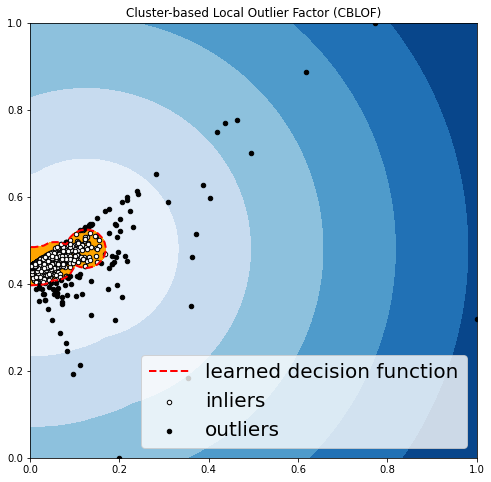

In [28]:
# Cluster based local outlier factor
# graph has been copied from 
# https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb

from numpy import percentile
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
        
# Use threshold value to consider a datapoint inlier or outlier
# threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show();


# Isolation Forest

### KNN

(1) KNN is supervised ML algorithm however when it comes to anomaly detection it acts as unsupervised algo because there is not much to learn from the training set.

(2) User-defined contamination is percentage of outliers we want algorithm to detect.

(3) For a datapoint its distance to Kth nearest neighbour is considered as outlier score.



In [29]:
# Code taken from
# https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb

OUTLIERS:  100 INLIERS:  9894


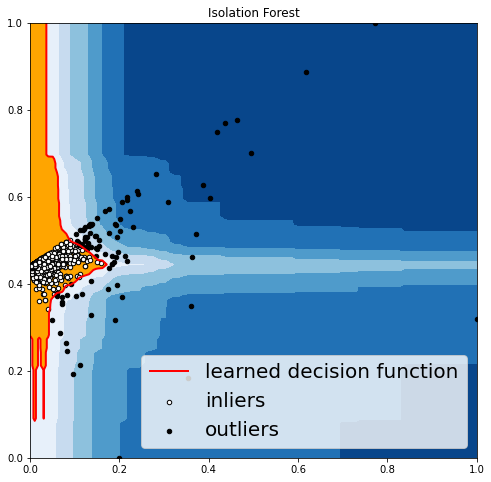

In [30]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IForest(contamination=outliers_fraction,random_state=0)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();